In [180]:
#massa do veículo HB20 - 1724kg distribuído em 4 rodas (considerar apenas a massa do pneu reduz o atrito)
mpneu=1724/4
#densidade do ar
do=1.2013
#volume do ar no pneu (Litros)
vo=10
#massa do ar no pneu
mar=do*vo
#raio do pneu aro 14 - 24.25cm -> 0.2425m
raio=0.2425
#velocidade angular de rotação do pneu do carro (rad/s)
w=123.7
#velocidade média do carro - 108km/h -> 30m/s
v=30
#Área da superfície da borracha (m2) - pneu de aro 14 - 2665,075 cm2 -> 0.2665075 m2
Ab=0.2665075
#Temperatura da borracha
Tb=20+273.15
#coeficiente de transferência convectiva do ar - W/m2*K
hconv=8.05
#Temperatura ambiente
Tar=20+273.15
#calor específico do ar - kJ/kg*K
car=1.012
#calor específico da borracha - kJ/kg*K
cpneu=1.590984

In [181]:
def EquacoesDiferenciais(Y0,t):
    T0=Y0[0]
    t0=Y0[1]
    
    Qatrito = 0.2*(mpneu*(v**2))/2 #20% da Ec convertida em Et
    Qext = hconv * Ab * (T0 - Tar) #fluxo de calor da borracha pro ar externo ao pneu por convecção
    Qint = hconv * Ab * (T0 - t0) #fluxo de calor da borracha pro ar interno ao pneu por convecção
    
    dT0dt = (1/mpneu*cpneu)  * (Qatrito - Qext - Qint) #Temperatura da borracha
    dt0dt = (1/mpneu*car) * Qint #Temperatura do ar interno
    
    return [dT0dt,dt0dt]

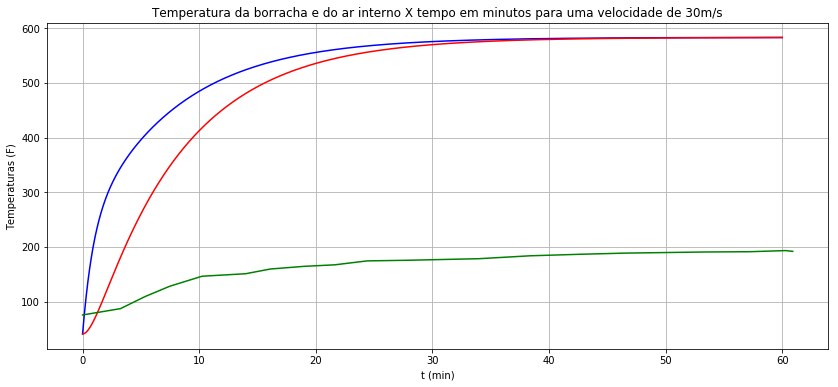

In [182]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

lista_tempo=np.arange(0,3600,0.1)
Y0=[20+273.15,20+273.15]

Solucao=odeint(EquacoesDiferenciais,Y0,lista_tempo)

Fahrenheit_0=[]
for i in Solucao[:,0]:
    Fahrenheit_0.append(((i/60)/5)*9+32)
Fahrenheit_1=[]
for i in Solucao[:,1]:
    Fahrenheit_1.append(((i/60)/5)*9+32)

Validacao_x=[0,3.25203252,5.365853659,7.479674797,10.24390244,13.98373984,16.09756098,19.02439024,21.62601626,24.3902439,27.96747967,33.98373984,38.37398374,42.60162602,46.50406504,53.17073171,57.23577236,60.30081301,60.90243902]
Validacao_y=[75.530956848,87.15422139,109.29831144,128.11932458,146.38348968,150.96622889,159.587242,164.5275797,167.2540338,174.4412758,175.6247655,178.4585366,183.7613508,186.5110694,188.6589118,190.6776735,191.2622889,193.3016886,191.8435272]

plt.figure(figsize = [14, 6])
plt.plot(lista_tempo/60, Fahrenheit_0, 'b', label="Temperatura Borracha")
plt.plot(lista_tempo/60, Fahrenheit_1, 'r', label="Temperatura Ar Interno")
plt.plot(Validacao_x, Validacao_y, 'g', label="Validação")
plt.ylabel('Temperaturas (F)')
plt.xlabel('t (min)')
plt.title('Temperatura da borracha e do ar interno X tempo em minutos para uma velocidade de 30m/s')
plt.grid(True)
plt.show()

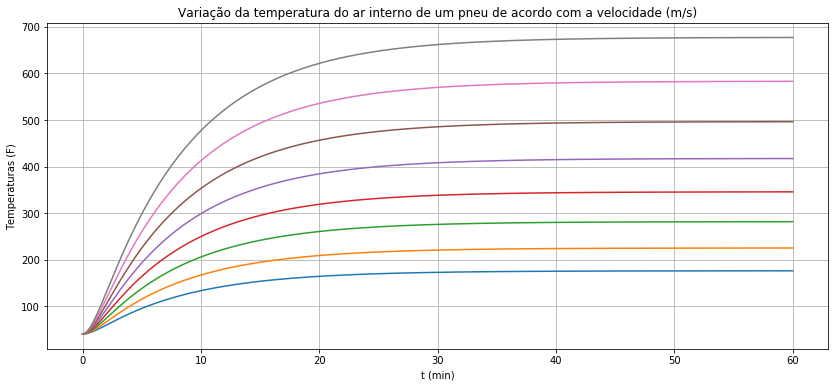

In [183]:
def EquacoesDiferenciais_velocidade(Y0,t,v):
    T0=Y0[0]
    t0=Y0[1]
    
    Qatrito = 0.2*(mpneu*(v**2))/2 #20% da Ec convertida em Et
    Qext = hconv * Ab * (T0 - Tar) #fluxo de calor da borracha pro ar externo ao pneu por convecção
    Qint = hconv * Ab * (T0 - t0) #fluxo de calor da borracha pro ar interno ao pneu por convecção
    
    dT0dt = (1/mpneu*cpneu)  * (Qatrito - Qext - Qint) #Temperatura da borracha
    dt0dt = (1/mpneu*car) * Qint #Temperatura do ar interno
    
    return [dT0dt,dt0dt]

Solucao_velocidade_fahrenheit=[]

velocidade=np.arange(15,35,2.5)
plt.figure(figsize = [14, 6])
for e in velocidade:
    Solucao_velocidade=odeint(EquacoesDiferenciais_velocidade,Y0,lista_tempo,args=(e,))
    plt.plot(lista_tempo/60, (((Solucao_velocidade[:,1]/60)/5)*9+32),'',label="%1.f m/s"%e)
plt.ylabel('Temperaturas (F)')
plt.xlabel('t (min)')
plt.title('Variação da temperatura do ar interno de um pneu de acordo com a velocidade (m/s)')
plt.grid(True)
plt.show()

    